<a href="https://colab.research.google.com/github/thilanhasitha/Deep-Learning-Modul/blob/main/IT22216250Q2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Task 2 - Implementing LSTM for Time-Series Forecasting**


***Read the following descriptions and instructions***

Time-series forecasting is a crucial task in various fields, including finance, economics, and weather prediction. In this question, you'll work with Long Short-Term Memory (LSTM) networks, a type of recurrent neural network (RNN) that is particularly effective at learning from sequences of data. LSTMs are designed to capture long-term dependencies in time-series data, making them well-suited for predicting future values based on historical patterns.

In this task, you will implement an LSTM model to forecast stock prices using historical data. Specifically, you'll use the closing prices of a stock to predict future prices, which is a common real-world application of time-series analysis in financial markets. This exercise will help you understand the principles of sequence modeling and how LSTMs can be applied to complex prediction tasks.

In [8]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [9]:
# 1. Load and Preprocess the Data
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df['Close'].values  # Use the 'Close' price for prediction

In [10]:
# 2. Prepare the Dataset for LSTM
def create_dataset(data, time_step=60):
    X, y = [], []
    for i in range(len(data) - time_step):
        X.append(data[i:(i + time_step)])
        y.append(data[i + time_step])
    return np.array(X), np.array(y)

In [11]:
# Load Data
file_path = '/content/GOOG.csv'  # Path to the dataset in Colab or Jupyter home directory
data = load_data(file_path)

In [12]:
# Normalize the Data
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data.reshape(-1, 1)).reshape(-1)

**time_step = 60:** This variable defines the length of the input sequence, meaning we will use the past 60 days of stock prices to predict the next day's closing price. This value is chosen to capture enough historical information to make an accurate prediction. You can change and try

In [13]:

# Create the Dataset
time_step = 60  # Using 60 days of data to predict the next day's price
X, y = create_dataset(data, time_step)

In [14]:
# Reshape for LSTM input [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

In [15]:
# Split the Data into Training and Testing Sets (80% train, 20% test)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

***Modify the number of units in the LSTM layers and consider adding more layers or changing the dropout rate to see how these adjustments affect the model's performance***

Experiment with 'units'

Experiment with dropout for regularization

Add another LSTM layer



In [16]:
# 3. Define the LSTM Model
model = Sequential()

# --- Students: Modify the number of LSTM layers and units to experiment with model complexity ---
model.add(LSTM(units=50, return_sequences=True, input_shape=(time_step, 1)))  # <-- Experiment with 'units'
model.add(Dropout(0.2))  # Experiment with dropout for regularization

model.add(LSTM(units=50, return_sequences=False))  # <-- Add another LSTM layer
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_absolute_error')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


***Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize.***

In [17]:
# 4. Train the Model

model.fit(X_train, y_train, epochs=20, batch_size=32, verbose=1)  # <-- Experiment with 'epochs' and 'batch_size'

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 102ms/step - loss: 0.3817
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 96ms/step - loss: 0.1330
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.1089
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1295
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.1049
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1177
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 0.0895
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.1029
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0943
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0949
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step - loss: 0.0869
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 0.1000
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 0.0989
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 133ms/step - loss: 0.0939
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 131ms/step - loss: 0.0954
Epoch 16/20
5/5 ━━━━━━━━━━━━━

In [18]:
# 5. Predict on the Test Data
y_pred = model.predict(X_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 298ms/step


In [19]:
# Inverse transform to get the original scale
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1)).reshape(-1)
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).reshape(-1)

***Analyze the plot to evaluate the model performance. Consider modifying the model architecture or training parameters to improve accuracy***

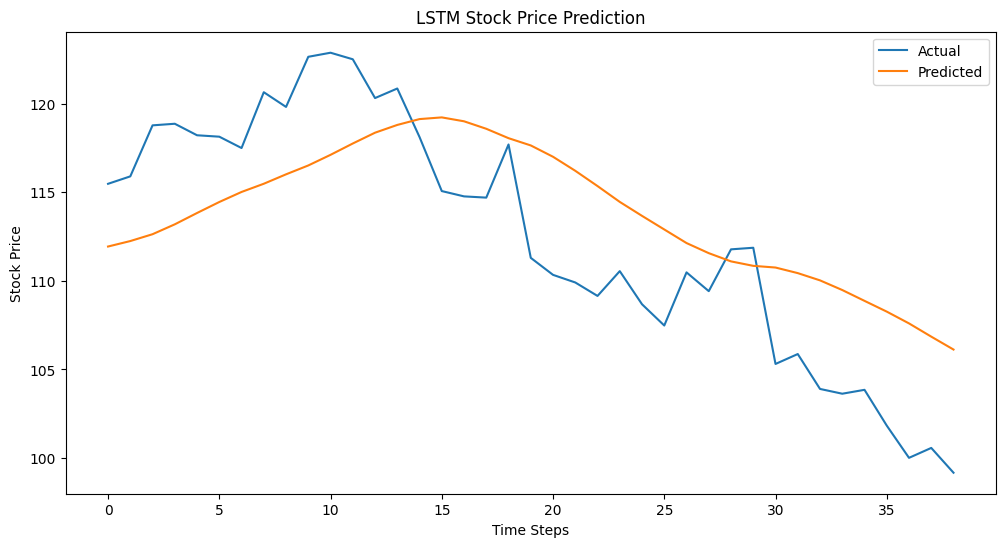

In [20]:
# 6. Plot the Results
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()



In [ ]:
## Answer the following questions. (You can type answers in a text cell) 1. What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model? 2. What is the purpose of the Dropout layer in the LSTM model? 3. In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?


In [21]:
# 3. Define the LSTM Model
model = Sequential()

# First LSTM layer with more units
model.add(LSTM(units=100, return_sequences=True, input_shape=(time_step, 1)))
model.add(Dropout(0.3))   # increase dropout slightly

# Second LSTM layer with fewer units
model.add(LSTM(units=70, return_sequences=True))
model.add(Dropout(0.3))

# Third LSTM layer for deeper representation
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(1))

# Compile
model.compile(optimizer='adam', loss='mean_absolute_error')


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
## Adjust the epochs and batch_size during the training phase to optimize the model’s learning process and its ability to generalize

In [22]:
from keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[early_stop], verbose=1)


Epoch 1/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 6s 325ms/step - loss: 0.5132 - val_loss: 0.0649
Epoch 2/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 0.1601 - val_loss: 0.0659
Epoch 3/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - loss: 0.1472 - val_loss: 0.0578
Epoch 4/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 130ms/step - loss: 0.1597 - val_loss: 0.1225
Epoch 5/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 0.1743 - val_loss: 0.0653
Epoch 6/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 129ms/step - loss: 0.1555 - val_loss: 0.0614
Epoch 7/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.1177 - val_loss: 0.0963
Epoch 8/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 170ms/step - loss: 0.1254 - val_loss: 0.0687
Epoch 9/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 244ms/step - loss: 0.1199 - val_loss: 0.0613
Epoch 10/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 220ms/step - loss: 0.1120 - val_loss: 0.0650
Epoch 11/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 216ms/step - loss: 0.1162 - val_loss: 0.0615
Epoch 12/100
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 128ms/step - loss: 0.1

In [25]:
## Examine the plot comparing predicted stock prices with actual prices. If the model’s predictions are inaccurate,
## experiment with different configurations and training parameters to achieve better results.

In [26]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")


MAE: 4.4224441053936285
RMSE: 4.816562343439567


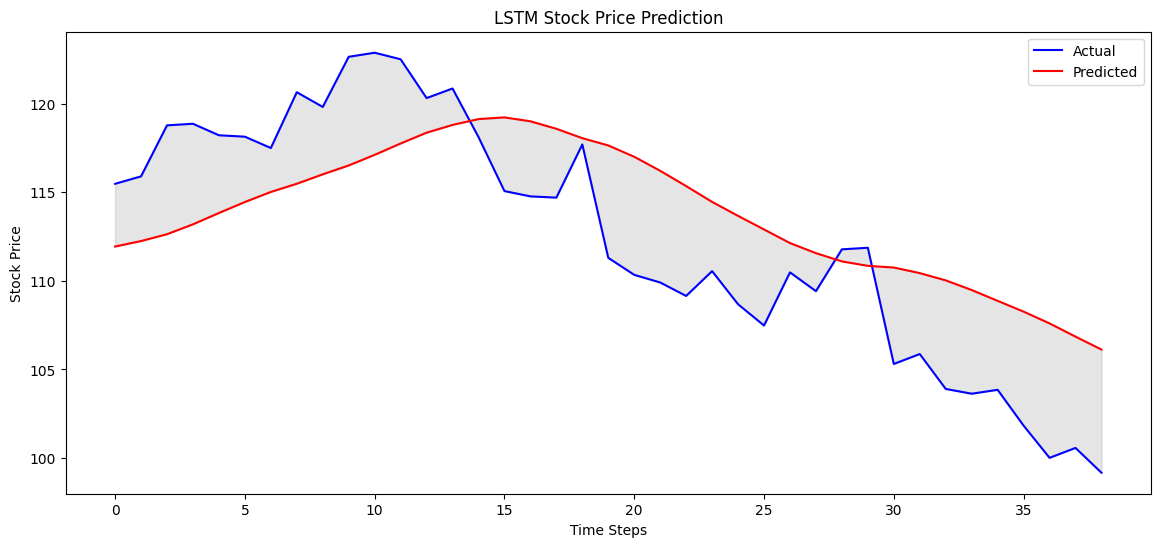

In [28]:
plt.figure(figsize=(14,6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.fill_between(range(len(y_test)), y_test, y_pred, color='gray', alpha=0.2)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()


In [ ]:
## 1). What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?
 ## *Normalization scales the data to a consistent range (usually 0–1).

## *It improves training stability and helps the LSTM converge faster.

## *Prevents large values from dominating the learning process, ensuring all features contribute proportionally.

In [29]:
## 2. What is the purpose of the Dropout layer in the LSTM model?

## * Dropout randomly disables a fraction of neurons during training.

##  *It prevents overfitting by forcing the network to learn more robust features.

##  *Encourages generalization so the model performs better on unseen data.

In [30]:
##3. In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?

 ## * The model is accurately capturing the patterns in the stock price data.

## * Predictions are reliable and the LSTM is effectively learning the temporal dependencies.

# * A close match indicates good model performance and minimal prediction error.

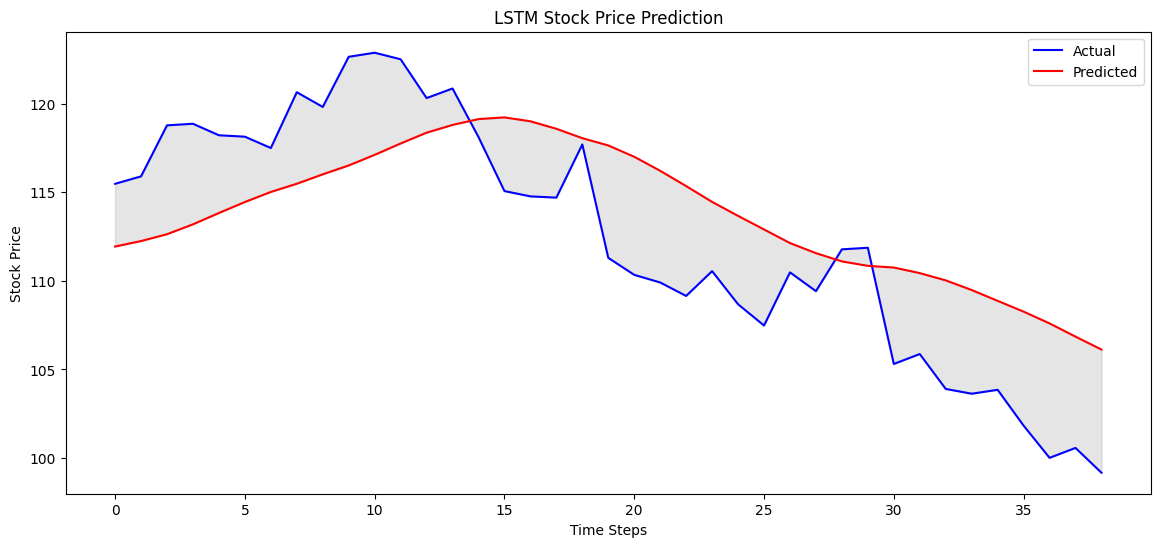

In [27]:
plt.figure(figsize=(14,6))
plt.plot(y_test, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.fill_between(range(len(y_test)), y_test, y_pred, color='gray', alpha=0.2)
plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('LSTM Stock Price Prediction')
plt.legend()
plt.show()


***Answer the following questions. (You can type answers in a text cell)***
1.	What is the purpose of normalizing the 'Close' prices before feeding them into the LSTM model?
2.	What is the purpose of the Dropout layer in the LSTM model?
3.	In the plot showing actual vs predicted stock prices, what does it indicate if the predicted line closely follows the actual line?
